### AUTHOR: KARTHIK THALLAM


### DESCRIPTIVE STATISTICS AND REGRESSION MODELS

---------

#### Import the Libraries and Packages:

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

![Wine Quality](img/picture.jfif)


###### Source: [Red & White Wines](https://www.onmanorama.com/food/recipe/2019/11/08/red-white-wine-christmas-recipe.html)

In [43]:
df = pd.read_csv('winequalityN.csv')

df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#### Here, column 'type' is nominal and we can convert that column with numbers but the order is arbitrary and measures of central tendencies or dispersion would be meaningless

In [3]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

#### Here, column 'quality' is ordinal becuase it has a meaningful order. As in, number 9 represents the best quality of the wine where as number 3 represents the bad quality of the wine for the samples given in the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


##### There are 6497 rows and 13 columns. But the 13th column named as quality is considered to be the dependant variable

#### Descriptive Statistics:

In [5]:
df.describe().transpose()    #df.describe() gives the descriptive statistics of all the numerical columns of the dataset

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


#### Mean of the columns:

In [6]:
for column in df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']]:
    
    colSeries = df[column]
    print('Mean of {} is {}' .format(column, colSeries.mean()))
    print()

Mean of fixed acidity is 7.2165793124710795

Mean of volatile acidity is 0.33969101556480247

Mean of citric acid is 0.3187218971358124

Mean of residual sugar is 5.444326404926885

Mean of chlorides is 0.05604157043879931

Mean of free sulfur dioxide is 30.525319378174544

Mean of total sulfur dioxide is 115.7445744189626

Mean of density is 0.9946966338309937

Mean of pH is 3.218395499383475

Mean of sulphates is 0.5312151547820745

Mean of alcohol is 10.491800831149511

Mean of quality is 5.818377712790519



#### Median of the columns:

In [7]:
for column in df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']]:
    
    colSeries = df[column]
    print('Median of {} is {}' .format(column, colSeries.median()))
    print()

Median of fixed acidity is 7.0

Median of volatile acidity is 0.29

Median of citric acid is 0.31

Median of residual sugar is 3.0

Median of chlorides is 0.047

Median of free sulfur dioxide is 29.0

Median of total sulfur dioxide is 118.0

Median of density is 0.9948899999999999

Median of pH is 3.21

Median of sulphates is 0.51

Median of alcohol is 10.3

Median of quality is 6.0



#### Mode of the columns:

In [8]:
df.mode()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,6.8,0.28,0.3,2.0,0.044,29.0,111.0,0.9972,3.16,0.5,9.5,6.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9976,NaN,NaN,NaN,NaN


#### Here two rows were displayed becuase one column has two mode values. For instance, the density column has two values '0.9972' and '0.9976' which are repeated most no. of times.

#### Range of the columns:

In [9]:
for column in df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']]:
    
    colSeries = df[column]
    print('Range of {} is {}' .format(column, (colSeries.max()-colSeries.min())))
    print()

Range of fixed acidity is 12.100000000000001

Range of volatile acidity is 1.5

Range of citric acid is 1.66

Range of residual sugar is 65.2

Range of chlorides is 0.602

Range of free sulfur dioxide is 288.0

Range of total sulfur dioxide is 434.0

Range of density is 0.05186999999999997

Range of pH is 1.2899999999999996

Range of sulphates is 1.78

Range of alcohol is 6.9

Range of quality is 6



#### Variance of the columns:

In [10]:
for column in df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']]:
    
    colSeries = df[column]
    print('Variance of {} is {}' .format(column, colSeries.var()))
    print()

Variance of fixed acidity is 1.6815601904014472

Variance of volatile acidity is 0.027109302633509195

Variance of citric acid is 0.021101862274176424

Variance of residual sugar is 22.63975106683421

Variance of chlorides is 0.0012275230637483015

Variance of free sulfur dioxide is 315.04119226636476

Variance of total sulfur dioxide is 3194.7200386773857

Variance of density is 8.992039783233338e-06

Variance of pH is 0.025840018058976632

Variance of sulphates is 0.02214564270313742

Variance of alcohol is 1.4225613158900883

Variance of quality is 0.7625747692568792



#### Standard Deviation of the columns:

In [11]:
for column in df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']]:
    
    colSeries = df[column]
    print('Standard Deviation of {} is {}' .format(column, colSeries.std()))
    print()

Standard Deviation of fixed acidity is 1.2967498565264803

Standard Deviation of volatile acidity is 0.16464902864429293

Standard Deviation of citric acid is 0.14526480053397803

Standard Deviation of residual sugar is 4.758124742672707

Standard Deviation of chlorides is 0.035036025227589696

Standard Deviation of free sulfur dioxide is 17.749399772002565

Standard Deviation of total sulfur dioxide is 56.52185452263032

Standard Deviation of density is 0.0029986730037190345

Standard Deviation of pH is 0.16074830655088293

Standard Deviation of sulphates is 0.14881412131628308

Standard Deviation of alcohol is 1.1927117488689747

Standard Deviation of quality is 0.8732552715311137



----------------------------

## Logistic Regression:

### EDA:

#### Correlation:

<AxesSubplot:>

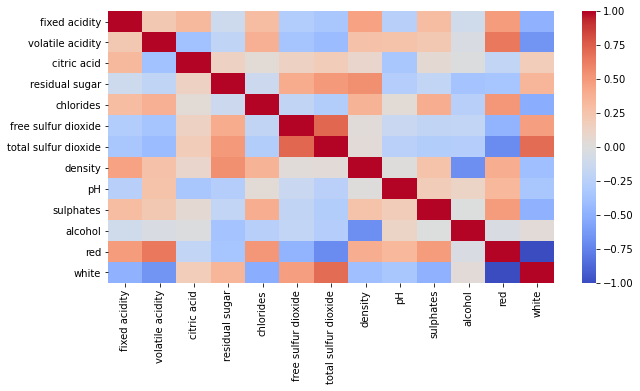

In [41]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), cmap='coolwarm')

##### It shows that the dependant variable quality is highly correlated with alcohol percentage of the wine i.e., if the alcohol percentage is more then the quality rank of the wine will be higher

#### Outlier Check:

<AxesSubplot:>

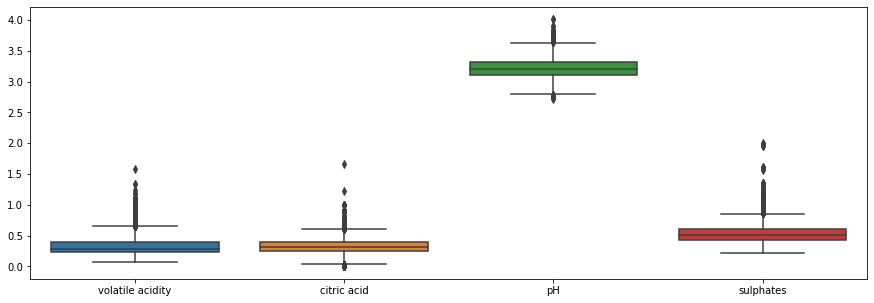

In [44]:
plt.figure(figsize=(15,5))
data = df.drop(['free sulfur dioxide', 'total sulfur dioxide', 'quality','residual sugar', 
                   'fixed acidity', 'alcohol', 'density', 'chlorides'], axis=1)

sns.boxplot(data=data)

#### It looks like all the four variables shown above are having outliers and 50% of observations are having a pH value between 3.1 to 3.4 approximately

### Data Cleaning:

#### Checking for Null values:

In [14]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

##### Since the no. of null values are very less we can just replace them with mean of their columns:

In [15]:
df['fixed acidity'] = df['fixed acidity'].fillna((df['fixed acidity'].mean()))
df['volatile acidity'] = df['volatile acidity'].fillna((df['volatile acidity'].mean()))
df['citric acid'] = df['citric acid'].fillna((df['citric acid'].mean()))
df['residual sugar'] = df['residual sugar'].fillna((df['residual sugar'].mean()))
df['chlorides'] = df['chlorides'].fillna((df['chlorides'].mean()))
df['pH'] = df['pH'].fillna((df['pH'].mean()))
df['sulphates'] = df['sulphates'].fillna((df['sulphates'].mean()))

In [16]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### Converting the dependent variable into a binary output varibale:

<AxesSubplot:xlabel='quality'>

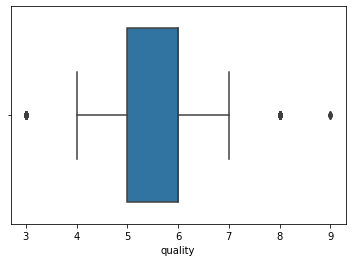

In [17]:
sns.boxplot(df['quality'])

##### So from the above box plot, lets consider the quality above 3rd quartile as good i.e., if quality greater than 6 its good or else bad

In [18]:
df['quality'] = ['good' if x >= 6 else 'bad' for x in df['quality']]

df['quality'].value_counts()

good    4113
bad     2384
Name: quality, dtype: int64

##### Now there are two categorical columns in our data: type and quality. Let's encode them inorder for the model to understand them better

### Categorical Encoding:

**Its better to use Dummy values approach for encoding the categorical columns as it gives the flexibility to encode as many categorical variables as we would want to and also gives the freedom to label the encoded columns using a prefix**

In [19]:
#making sure to avoid the multi-variable trap or to avoid encoding the duplicate information
dummies = pd.get_dummies(df['type'], drop_first=False)   


#now we got the encoded columns so no need to have the original categorical column in the dataset
df = df.drop(['type'], axis=1)

df = pd.concat([df, dummies], axis=1)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red,white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,good,0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,good,0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,good,0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,good,0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,good,0,1


##### Now we can see 14th and 15th columns are Red wine and White wine respectively which are encoded with dummy variables

### Train/Test Split:

In [20]:
from sklearn.model_selection import train_test_split

X = df.drop(['quality'], axis=1).values

y = df['quality'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

### Scaling:

##### Since we have many outliers, its better to use RobustScaler which scales the data based on quartiles range by excluding the outliers from scaling parameters like IQR, First Quartile etc., whereas the MinMaxScaler and the StandardScaler methods are very sensitive to outliers and thus will not help us to boost the performance of the model

In [21]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_train

array([[ 0.53846154, -0.38888889,  0.73333333, ...,  0.83333333,
         0.        ,  0.        ],
       [-0.53846154, -0.66666667, -0.53333333, ..., -0.16666667,
         0.        ,  0.        ],
       [-0.15384615, -0.33333333,  0.06666667, ...,  1.22222222,
         0.        ,  0.        ],
       ...,
       [-0.76923077, -0.88888889, -0.2       , ...,  0.16666667,
         0.        ,  0.        ],
       [-0.23076923,  0.05555556,  1.2       , ..., -0.22222222,
         0.        ,  0.        ],
       [ 0.53846154,  2.22222222,  1.2       , ..., -0.55555556,
         1.        , -1.        ]])

In [22]:
X_train.shape

(5197, 13)

### Model Building:

In [23]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()

logr.fit(X_train, y_train)

predictions = logr.predict(X_test)

### Model Evaluation:

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

print('Classification Report:')
print('***********************')
print(classification_report(y_test, predictions))
print()
print('Confusion Matrix:')
print('*****************')
print(confusion_matrix(y_test, predictions))

Classification Report:
***********************
              precision    recall  f1-score   support

         bad       0.66      0.59      0.63       465
        good       0.79      0.83      0.81       835

    accuracy                           0.75      1300
   macro avg       0.72      0.71      0.72      1300
weighted avg       0.74      0.75      0.74      1300


Confusion Matrix:
*****************
[[276 189]
 [142 693]]


### Model Interpretation:

#### Classification report gives the complete results of accuracy, f1-score, precision, and recall

#### Here we got 75% accuracy with a good f1-score of 0.63 and 0.81 in predicting the samples of both the qualities respectively

#### We can ahieve high accuracy after performing hyper parameter tuning

#### Confusion matrix gives the information about how good the model performed in predicting ‘good’ or ‘bad’

#### Here 276 observations are predicted BAD which are actually BAD

#### 189 observations are predicted GOOD but they are actually BAD

#### 142 observations are predicted BAD but they are actually GOOD and 693 observations are predicted GOOD which are actually GOOD

---------------

### Linear Regression:

![Forest Fires](image/picture.jpeg)


##### Source: [Forest Fires](https://cdn.vox-cdn.com/thumbor/HUqbF0bSjZvsoQPuFsCOmIVJJ7I=/0x0:2400x1600/1200x800/filters:focal(1008x608:1392x992)/cdn.vox-cdn.com/uploads/chorus_image/image/69539194/26264032.0.jpeg)

In [25]:
df1 = pd.read_csv('forestfires.csv')

df1.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


#### So the dataset contains 517 records with 13 attributes each

### EDA:

#### Check for Null values:

In [27]:
df1.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [28]:
df1.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


#### Drop the duplicates to hault the Redundancy issue:

In [29]:
dup = df1.duplicated()

sum(dup)

4

In [30]:
df1 = df1.drop_duplicates()

df1.shape

(513, 13)

In [31]:
X = df1.iloc[:,:-1].values
y = df1.iloc[:,10].values

X, y

(array([[7, 5, 'mar', ..., 51, 6.7, 0.0],
        [7, 4, 'oct', ..., 33, 0.9, 0.0],
        [7, 4, 'oct', ..., 33, 1.3, 0.0],
        ...,
        [7, 4, 'aug', ..., 70, 6.7, 0.0],
        [1, 4, 'aug', ..., 42, 4.0, 0.0],
        [6, 3, 'nov', ..., 31, 4.5, 0.0]], dtype=object),
 array([6.7, 0.9, 1.3, 4. , 1.8, 5.4, 3.1, 2.2, 5.4, 4. , 7.2, 4. , 6.7,
        2.2, 4.5, 5.4, 5.4, 4.9, 4. , 4.5, 2.7, 2.7, 4.5, 5.8, 5.8, 5.4,
        5.8, 1.3, 2.7, 3.6, 3.6, 7.6, 1.8, 3.6, 2.7, 4.5, 4.5, 5.4, 4. ,
        2.7, 3.1, 6.7, 5.4, 2.7, 4.9, 4. , 3.6, 3.1, 1.8, 5.8, 1.3, 2.2,
        4.9, 3.6, 2.2, 4.9, 2.7, 5.4, 0.9, 5.8, 6.3, 4.9, 2.7, 3.1, 4.5,
        4.5, 5.4, 6.3, 4.5, 7.6, 3.6, 6.3, 4.5, 1.3, 3.1, 3.1, 3.1, 2.7,
        6.7, 6.3, 2.2, 4.5, 0.9, 3.6, 0.9, 2.2, 2.2, 3.6, 4.9, 5.8, 5.4,
        6.3, 4.9, 2.7, 1.3, 1.8, 5.4, 4.5, 5.4, 5.4, 4. , 4.5, 3.1, 6.3,
        3.1, 3.1, 3.1, 5.4, 5.8, 4.5, 3.6, 2.7, 7.6, 6.3, 6.3, 4.9, 4. ,
        3.1, 2.2, 5.4, 5.4, 3.1, 5.4, 5.4, 2.2, 3.1, 3.6, 0.9,

#### Encoding:

In [32]:
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder()

X = OHE.fit_transform(X[:,2:3]).toarray()

X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

### Train/Test split:

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

### Scaling:

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

### Model Building:

In [35]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

predictions_linear = lin_reg.predict(X_test)

### Model Evaluation:

In [36]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [38]:
print('MAE:', mean_absolute_error(y_test, predictions_linear))
print()
print('MSE:', mean_squared_error(y_test, predictions_linear))
print()
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions_linear)))

MAE: 1.358137204321248

MSE: 2.8890758055185555

RMSE: 1.699728156358703
